In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
housing = pd.read_csv('ScaledData.csv')

In [6]:
round(housing.head(),2)

Unnamed: 0    month        town flat_type block        street_name  \
0           0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4   
1           1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10   
2           2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4   
3           3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10   
4           4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10   

   storey_range  floor_area_sqm      flat_model  lease_commence_date  ...  \
0             8            60.0        Improved                 1986  ...   
1             2            68.0  New Generation                 1981  ...   
2             2            69.0  New Generation                 1980  ...   
3             2            68.0  New Generation                 1979  ...   
4             8            68.0  New Generation                 1980  ...   

   latitude  longitude                 full_address  scaled_floor_area_sqm  \
0      1.38     103.84   ANG MO KIO AVE 4 BLOCK 174                  -1.54   
1      1.37     103.86  ANG MO KIO AVE 10 BLOCK 541                  -1.21   
2      1.37     103.84   ANG MO KIO AVE 4 BLOCK 163                  -1.17   
3      1.37     103.86  ANG MO KIO AVE 10 BLOCK 446                  -1.21   
4      1.37     103.86  ANG MO KIO AVE 10 BLOCK 557                  -1.21   

   scaled_lease_commence_date scaled_remaining_lease  scaled_resale_price  \
0                       -0.57                  -0.36                -1.24   
1                       -0.98                  -0.78                -1.10   
2                       -1.06                  -0.86                -1.03   
3                       -1.14                  -0.94                -1.00   
4                       -1.06                  -0.86                -1.00   

   scaled_storey_range  scaled_latitude  scaled_longitude  
0                -0.08             0.19             -0.02  
1                -1.15             0.17              0.23  
2                -1.15             0.16             -0.01  
3                -1.15             0.02              0.23  
4                -0.08             0.11              0.26  

[5 rows x 23 columns]

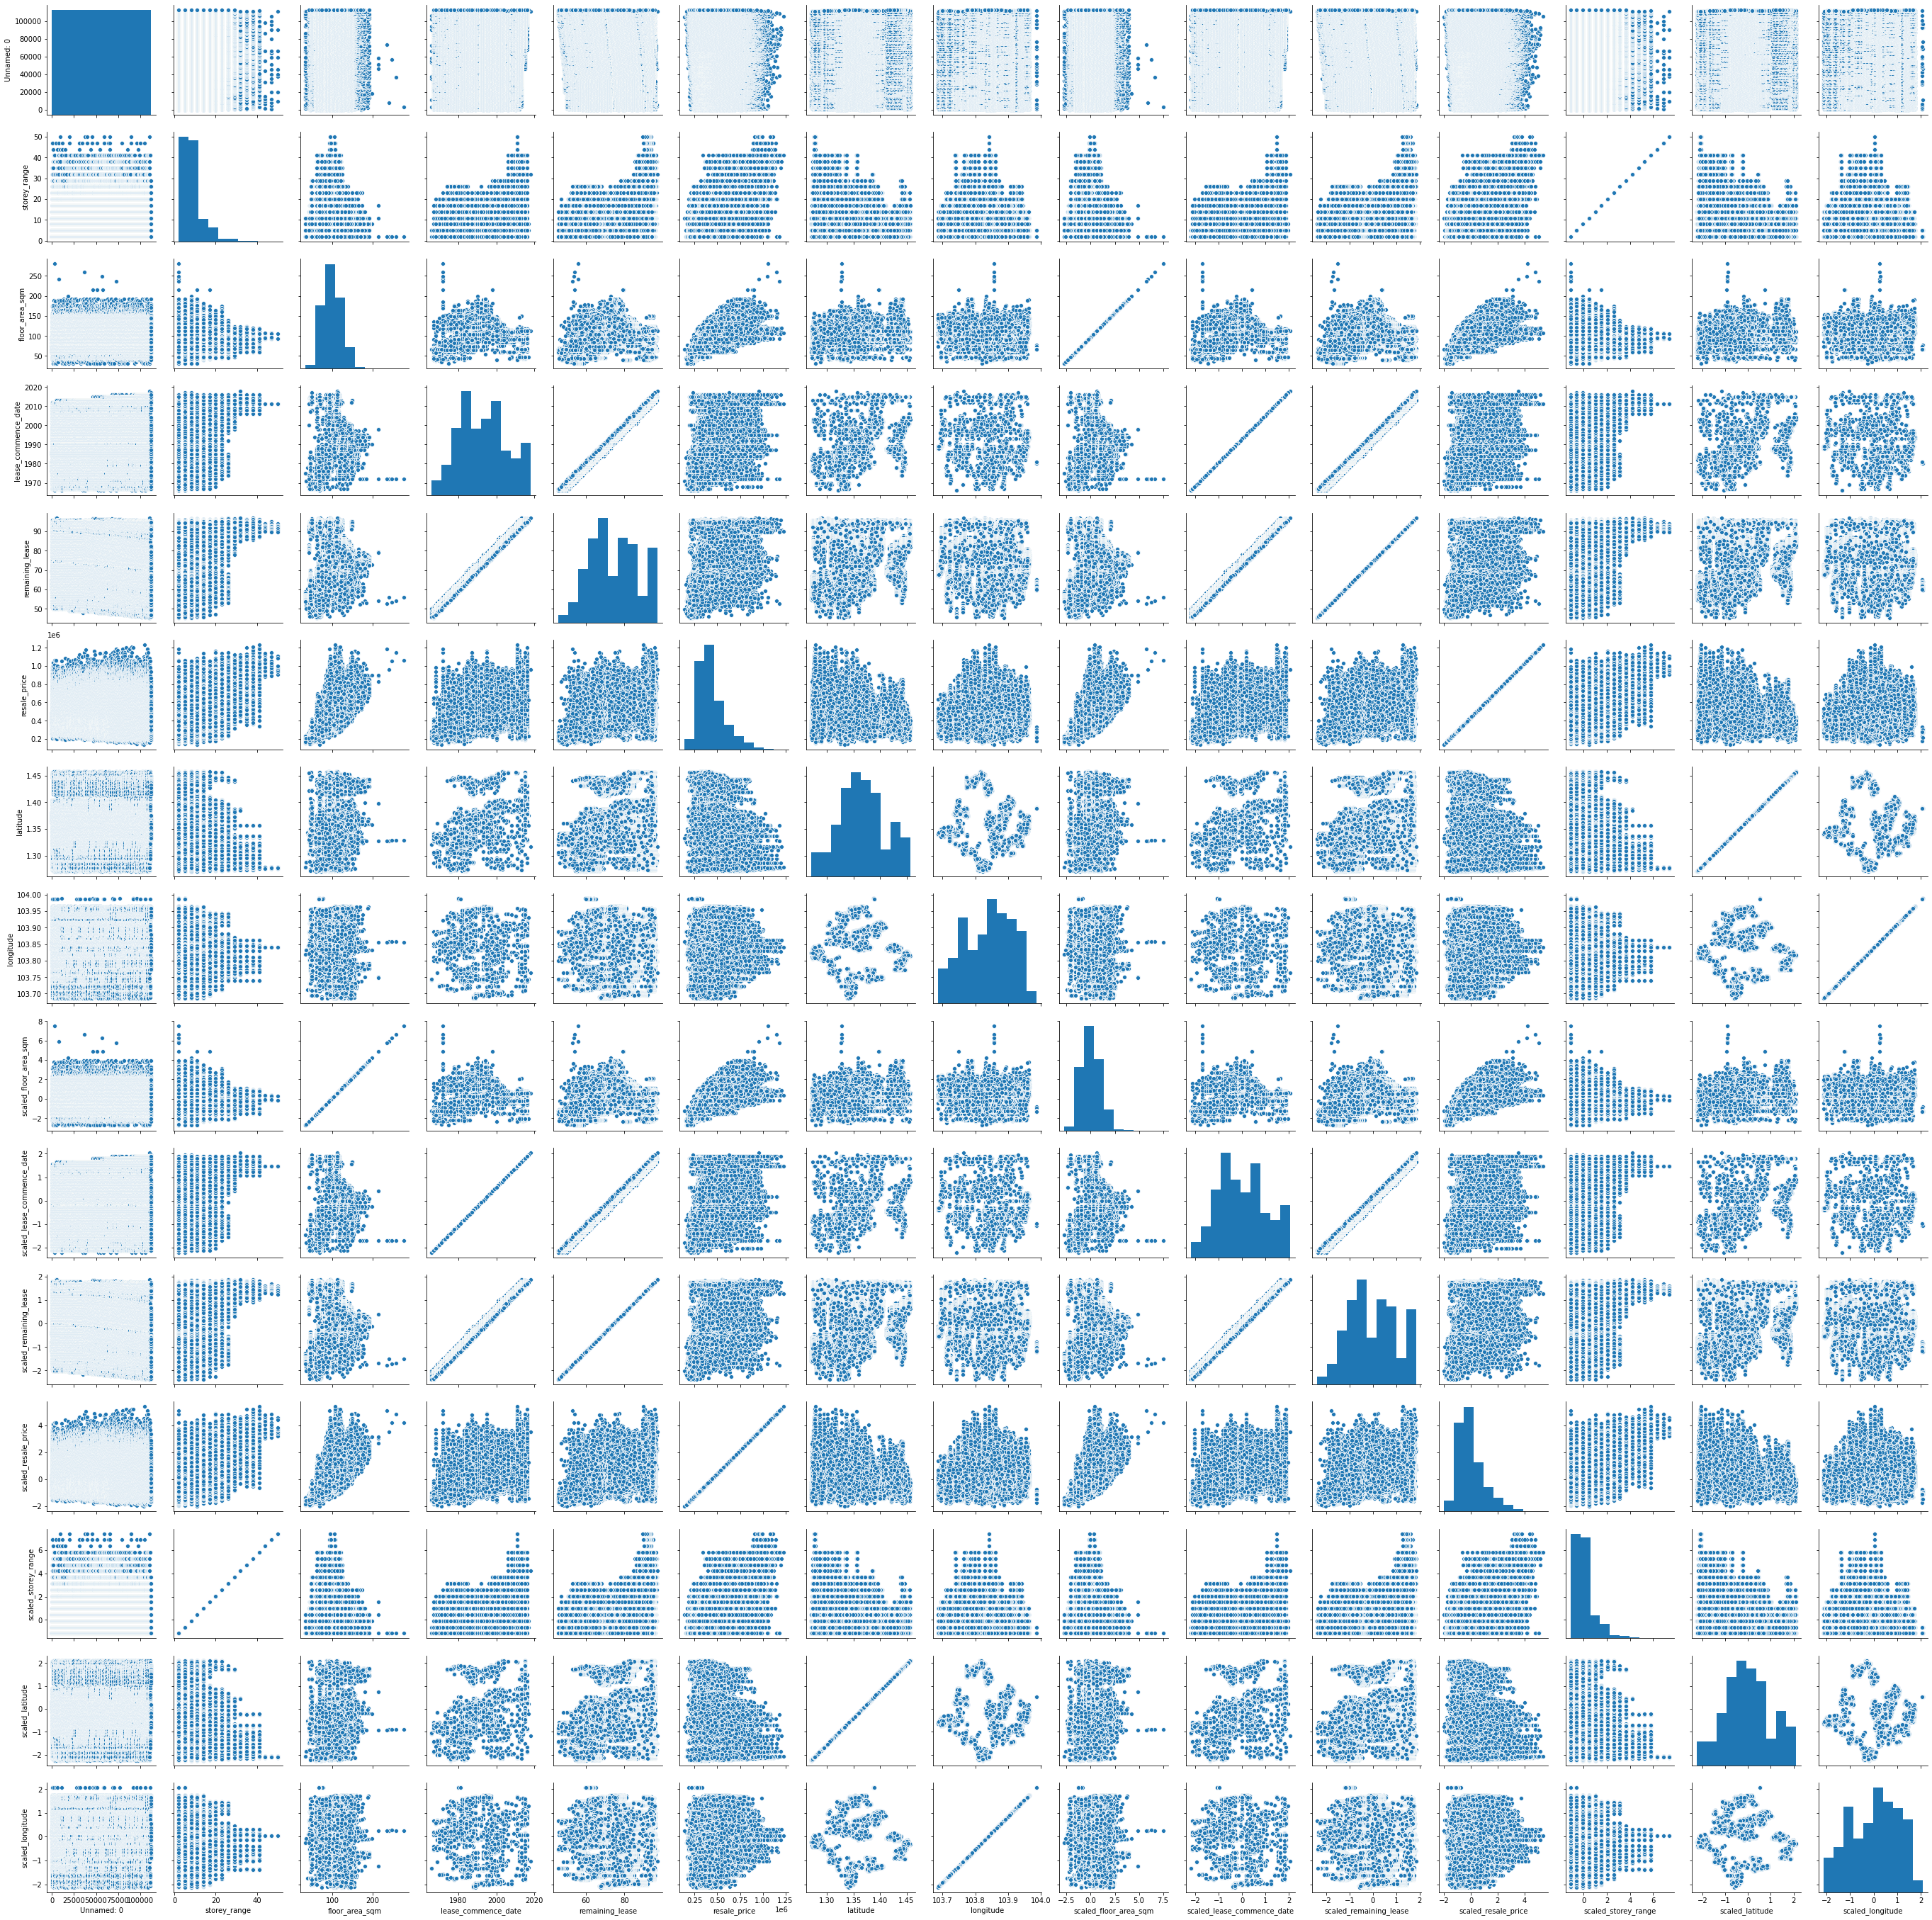

In [7]:
sns.pairplot(housing)

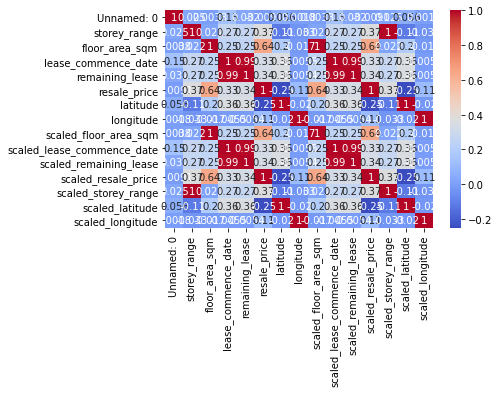

In [8]:
sns.heatmap(housing.corr(),cmap='coolwarm',annot=True)

In [9]:
housing.columns

Index(['Unnamed: 0', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'new_address', 'latitude',
       'longitude', 'full_address', 'scaled_floor_area_sqm',
       'scaled_lease_commence_date', 'scaled_remaining_lease',
       'scaled_resale_price', 'scaled_storey_range', 'scaled_latitude',
       'scaled_longitude'],
      dtype='object')

In [27]:
X = housing[['scaled_floor_area_sqm','scaled_remaining_lease','scaled_storey_range']]

y = housing['scaled_resale_price'] 

In [28]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
pd.DataFrame(lm.coef_,X.columns, columns=['Coefficients'])

Coefficients
scaled_floor_area_sqm       0.608953
scaled_remaining_lease      0.095469
scaled_storey_range         0.331751

In [33]:
y_pred = lm.predict(X_test)

In [39]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
mse = mean_squared_error(y_test, y_pred)

In [40]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

In [41]:
metrics.mean_squared_error(y_test, y_pred)

0.45783669800182814

In [42]:
metrics.mean_absolute_error(y_test, y_pred)

0.49859110930366

In [43]:
r2

0.5374896350815639

In [44]:
rmse

0.6766363114715528

In [37]:
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train)

m1 = mod.fit()

p_values = m1.summary2().tables[1]['P>|t|']

In [38]:
m1.summary2().tables[1]

Coef.  Std.Err.           t  P>|t|    [0.025  \
scaled_floor_area_sqm   0.608953  0.002330  261.320336    0.0  0.604386   
scaled_remaining_lease  0.095469  0.002423   39.403416    0.0  0.090720   
scaled_storey_range     0.331751  0.002341  141.737554    0.0  0.327164   

                          0.975]  
scaled_floor_area_sqm   0.613521  
scaled_remaining_lease  0.100218  
scaled_storey_range     0.336339